In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.pylab
plt.rcParams['figure.figsize']=(20,10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
original_df = pd.read_excel('/home/quark/Documents/projects/TFM/Databases/data.xlsx')
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')

marag_df = original_df[original_df['SiteId'] == 2][['Timestamp', 'TotalEntries']]
marag_df.set_index('Timestamp', inplace=True)
marag_df.sort_index(inplace=True)
marag_df = marag_df['2017-01-09 00:00:00':]
#Since from this date the time series is constinuous, we slice our dataframe consequently

In [3]:
def create_lags(dataframe, N):
    temp_df = dataframe.copy()
    for i in range(1,N+1):
        temp_df['t-' + str(i)] = temp_df['TotalEntries'].shift(i)
    
    return temp_df.iloc[N:]
df_with_lags = create_lags(marag_df, 48)

In [4]:
#Initial data preparation:
def train_dev_test_split(X_data, y_data):
    
##CODE IMPROVEMENT: raise error if X and y of different size!    
    cut1 = int(0.6*len(X_data))
    cut2 = ((len(X_data)-cut1)//2) + cut1
    X_train = X_data[:cut1]
    X_dev = X_data[cut1:cut2]
    X_test = X_data[cut2:]
    y_train = y_data[:cut1]
    y_dev = y_data[cut1:cut2]
    y_test = y_data[cut2:]
    
    return X_train, X_dev, X_test, y_train, y_dev, y_test
    
#X_train, X_temp, y_train, y_temp = train_test_split(men_df.drop('TotalEntriesMen', axis = 1), men_df['TotalEntriesMen'], test_size = 0.4, random_state = 42, shuffle=False)
X_train, X_dev, X_test, y_train, y_dev, y_test = train_dev_test_split(df_with_lags.drop(['TotalEntries'], axis=1), df_with_lags['TotalEntries'])

X_train_raw = marag_df[:X_train[-1:].index.astype(str)[0]]

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(marag_df['TotalEntries'])
print('ADF Statistic: ', result[0])
print('The p-value for the ADF test is ', result[1])
print('Critical Values:')
for key, value in result[4].items():#
    print('\t%s: %.3f' % (key, value))

ADF Statistic:  -12.257054215128269
The p-value for the ADF test is  9.259019177985374e-23
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
diff_marag = marag_df.diff(48)
diff_marag = diff_marag.dropna()

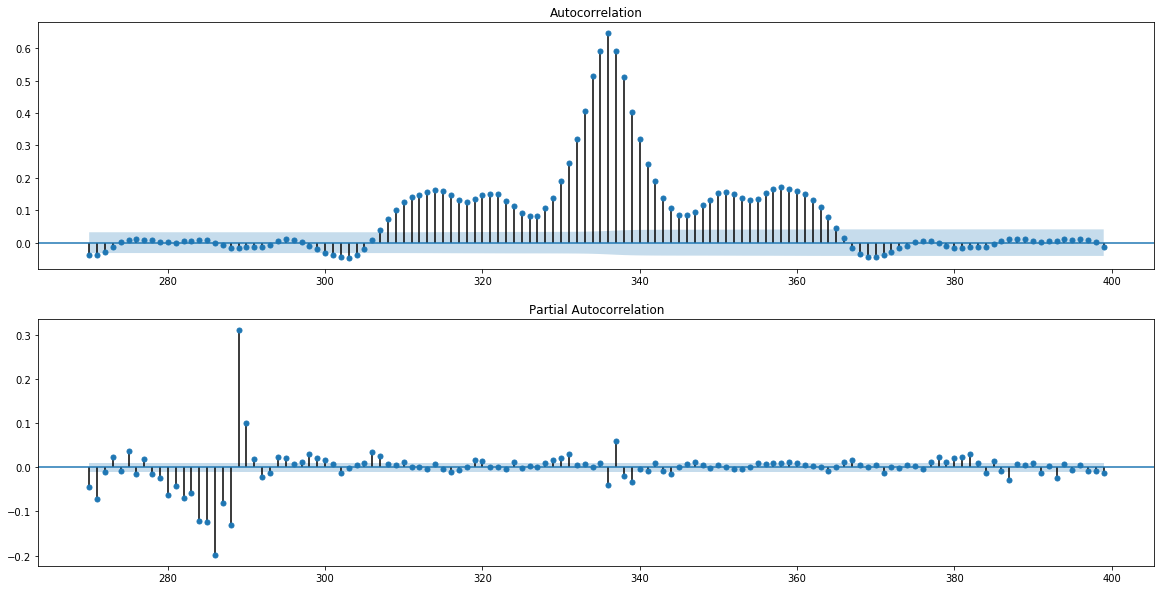

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2,1)
plot_acf(diff_marag, lags=range(270,400), ax=axes[0])
plot_pacf(diff_marag, lags=range(270,400), ax=axes[1])
plt.show()

In [7]:
import pyramid
#from pyramid.arima import auto_arima

ModuleNotFoundError: No module named 'pyramid'